In [1]:
#---------------------------------------------------------------Customer Sentiment Analysis------------------------------------------------------------

In [2]:
import joblib
import re
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
df = pd.read_csv("C:/Users/91801/Desktop/Insurance Project/dataset/customer_review.csv")
df.head()

,Customer_Id,Customer_Name,Customer_Location,Review_Text
0,CUS0001,Sarah Hoelscher,US,Easy to use and understand! Qu...
1,CUS0002,Bruce Winslow,CR,It was a real pleasure to spea...
2,CUS0003,Kelly Wilmeth,US,Byron Preston was super helpfu...
3,CUS0004,Stephanie LeBlanc,US,Byron Preston was amazing walk...
4,CUS0005,JPD,US,"Thanks Josh, top rate service ..."


In [4]:
#change columns to lowercase 
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44934 entries, 0 to 44933
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        44934 non-null  object
 1   customer_name      44934 non-null  object
 2   customer_location  44934 non-null  object
 3   review_text        44934 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [6]:
df.describe(include="object")

,customer_id,customer_name,customer_location,review_text
count,44934,44934,44934,44934
unique,20,20,3,44700
top,CUS0001,Sarah Hoelscher,US,Excellent service
freq,2259,2259,40440,14


In [7]:
def sentiment_analysis(raw_text):
    stop_words = set([
        'the', 'and', 'is', 'in', 'it', 'of', 'to', 'a', 'for', 'on', 'this', 'that', 'with',
        'as', 'was', 'but', 'are', 'have', 'be', 'at', 'or', 'an', 'so', 'if', 'out', 'not'])

    raw_text = " ".join(raw_text) if isinstance(raw_text, list) else raw_text
    lower = raw_text.lower()
    special = re.sub(r"[^a-zA-Z0-9]", " ", lower)
    tokens = special.split()
    tokens = [word for word in tokens if word not in stop_words]
    text = " ".join(tokens)

    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

In [9]:
df["sentiment_label"] = df["review_text"].apply(sentiment_analysis)

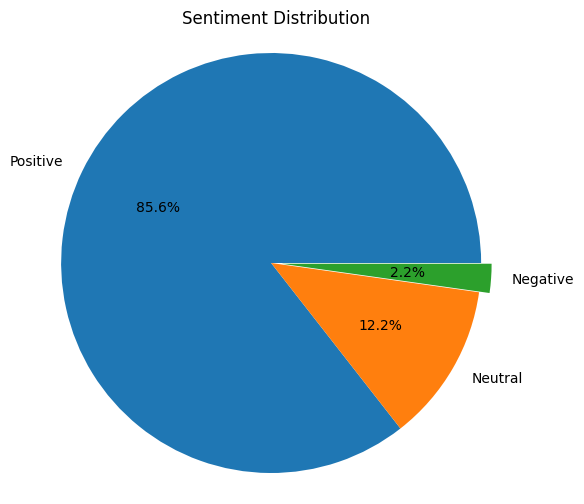

In [10]:
review_label = df["sentiment_label"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(review_label, labels=review_label.index, explode=[0, 0, 0.05], autopct="%1.1f%%")
plt.title("Sentiment Distribution")
plt.axis("equal")
plt.show()

In [11]:
# dump the pipline
joblib.dump(sentiment_analysis, "C:/Users/91801/Desktop/Insurance Project/models/sentiment_analysis.pkl")

['C:/Users/91801/Desktop/Insurance Project/models/sentiment_analysis.pkl']

In [13]:
# load the model
sentiment = joblib.load("C:/Users/91801/Desktop/Insurance Project/models/sentiment_analysis.pkl")
sentiment("I am Good") 

'Positive'